In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [13]:
df = pd.read_csv(r"C:\Users\sonak\OneDrive\infosys_stock_data.csv")
df.head()

,Date,OPEN,HIGH,LOW,close,VOLUME
0,18/07/2022,1450.00,1493.60,1448.05,1489.90,5835171
1,19/07/2022,1471.55,1486.85,1470.10,1484.15,3418540
2,20/07/2022,1501.25,1525.80,1500.00,1515.30,5079392
3,21/07/2022,1517.00,1535.45,1503.10,1532.90,5008061
4,22/07/2022,1534.00,1540.00,1492.15,1506.30,7020642


In [17]:
print(df.columns.tolist())

['Date ', 'OPEN ', 'HIGH ', 'LOW ', 'close ', 'VOLUME ']


In [21]:
for col in df.columns:
    print(f"'{col}'")

'DATE '
'OPEN '
'HIGH '
'LOW '
'CLOSE '
'VOLUME '


In [22]:
# Remove leading/trailing spaces and convert to uppercase
df.columns = df.columns.str.strip().str.upper()

In [23]:
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME']]
y = df['CLOSE']

In [24]:
print(df.columns.tolist())

['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']


In [25]:
# Define input features and target label
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME']]
y = df['CLOSE']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
predictions = model.predict(X_test)

In [41]:
print(type(y_test))
print(type(predictions))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [43]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)

y_test shape: (149,)
predictions shape: (149,)


In [45]:
print(type(y_test))
print(type(predictions))
print(len(y_test))
print(len(predictions))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
149
149


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_true = np.array(y_test).flatten()
y_pred = np.array(predictions).flatten()

r2 = r2_score(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5  

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

R² Score: 0.9987
RMSE: 6.96


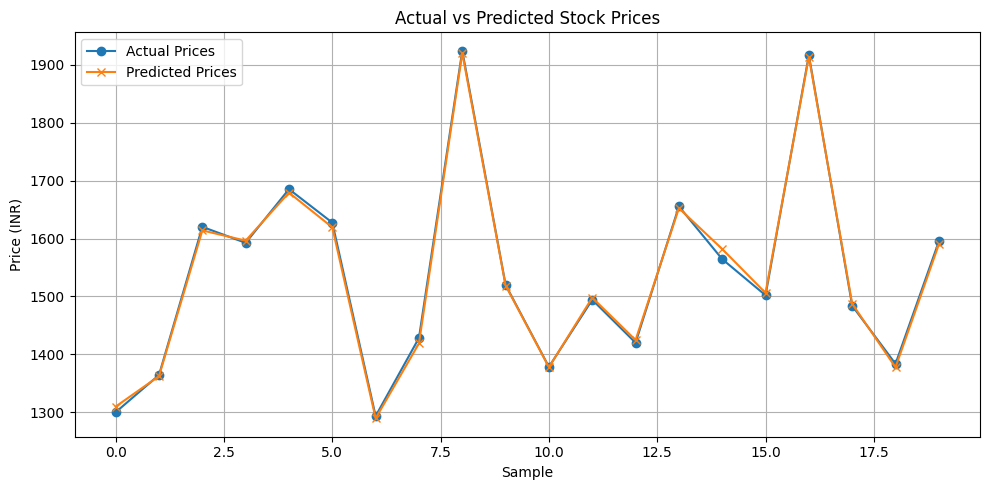

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(list(y_test.values)[:20], label='Actual Prices', marker='o')
plt.plot(predictions[:20], label='Predicted Prices', marker='x')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Sample")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()